In [1]:
%cd ..

/Users/erwan/Programmes/2022 Datacamp/solar_wind


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from problem import get_train_data
from problem import turn_prediction_to_event_list

In [3]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)

In [10]:
def plot_event(start, end, data, delta=36, figsize=(10, 60)):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    label_subset = labels_train.loc[subset.index]

    n_data_cols = data.shape[1]

    fig, axes = plt.subplots(nrows=n_data_cols, ncols=1, figsize=figsize, sharex=True)
    
    if n_data_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, data.columns):

        l = 0.1
        low = np.ma.masked_where(label_subset > l, subset[col])
        high = np.ma.masked_where(label_subset < l, subset[col])
        
        ax.plot(subset.index, low)
        ax.plot(subset.index, high, color='orange')
        ax.set_ylabel(col)


    # add vertical lines
    for ax in axes:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")

    
    return fig, axes
    
def consecutive_plots(data, events, n_events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)
    random_index = rng.randint(0, len(events) - n_events)

    for i in range(random_index, random_index + n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

def multiple_plots(data, n_events, events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)

    for i in rng.randint(0, len(events), n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

In [11]:
df = data_train.copy()
df['label'] = labels_train.copy()

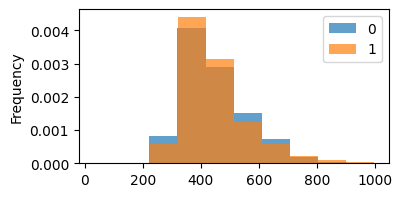

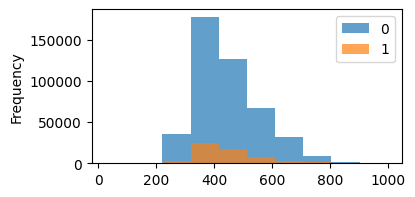

In [21]:
df = df.drop(df[df['V'] > 1000].index)
for density in [True, False]:
    _, ax = plt.subplots(figsize=(4, 2))
    df.groupby(['label'])['V'].plot(kind='hist', ax=ax, alpha=0.7, legend=True, density=density)

In [7]:
storm_df = df[['V', 'label']][df['label'] == 1]
calm_df = df[['V', 'label']][df['label'] == 0]

In [8]:
storm_df['V'].describe()

count    58478.000000
mean       448.358734
std        110.763908
min         30.136427
25%        372.916367
50%        421.350876
75%        495.695160
max        998.821838
Name: V, dtype: float64

In [9]:
calm_df['V'].describe()

count    450759.000000
mean        445.046875
std         109.947655
min          27.204723
25%         362.313751
50%         422.078705
75%         509.449966
max         999.594849
Name: V, dtype: float64

### V importante -> Pas de tempête